In [ ]:
api_key = ""  #replace it with openAI api key
load_trained_data = 1
run_openAI_experiments = 1-load_trained_data
# load_prompts_from_Git = 1
# run_openAI_experiments = 0  #openAI experiments
# load_RecLLMparsed_df = load_prompts_from_Git
# load_RecLLMparsed_with_itemIds = load_prompts_from_Git

## Utility Functions

In [ ]:
def print_statistics(data):
    total_interactions = data.shape[0]
    unique_users = data['userId'].nunique()
    unique_items = data['itemId'].nunique()

    print("\nFinal Dataset Overview:")
    print(f"Total Interactions: {total_interactions}")
    print(f"Unique Users: {unique_users}")
    print(f"Unique Tracks: {unique_items}")
    print(f"Average Interactions per User: {total_interactions / unique_users:.2f}")
    print(f"Interaction Matrix Density: {total_interactions / (unique_users * unique_items):.10f}")

# print_statistics(train_df)
# print_statistics(test_df)


# Load Dataset

1.   Direct download
2.   Github pull (default - train/test)



## 1. Direct download

In [ ]:
import requests
import zipfile
import os
import pandas as pd
from google.colab import files
import re
import pandas as pd

flag_ds = 'ml100k'
def download_csv(url, csv_file_name):
    response = requests.get(url, stream=True)

    if response.status_code == 200:
        with open(csv_file_name, "wb") as file:
            for chunk in response.iter_content(chunk_size=128):
                file.write(chunk)
        print(f"{csv_file_name} downloaded successfully.")
        return True
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
        return False

def load_dataset(dataset_flag):
    if dataset_flag == 'ml1m':
        urlTrain = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_1m/ml-1m_train_df_frac1.0.csv"
        urlValid = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_1m/ml-1m_valid_df_frac1.0.csv"
        urlTest = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_1m/ml-1m_test_df_frac1.0.csv"
        urlItem = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_1m/df_item_ml-1m.csv"
        urlUser = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_1m/df_user_ml-1m.csv"


        train_file, valid_file, test_file = "ml-1m_train_df.csv", "ml-1m_valid_df.csv", "ml-1m_test_df.csv"
        item_file, user_file = "df_item_ml-1m.csv", "df_user_ml-1m.csv"

        if download_csv(urlTrain, train_file) and download_csv(urlValid, valid_file) and download_csv(urlTest, test_file) \
        and download_csv(urlItem, item_file) and download_csv(urlUser, user_file):
            df_train = pd.read_csv(train_file)
            df_valid = pd.read_csv(valid_file)
            df_test = pd.read_csv(test_file)
            df_item = pd.read_csv(item_file)
            df_user = pd.read_csv(user_file)
            print("Datasets loaded successfully.")
            return df_train, df_valid, df_test, df_item, df_user
        else:
            print("Failed to download one or more datasets.")


    elif dataset_flag == 'ml100k':
        urlTrain = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_100k/ml-100k_train_df_frac1.0.csv"
        urlValid = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_100k/ml-100k_valid_df_frac1.0.csv"
        urlTest = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_100k/ml-100k_test_df_frac1.0.csv"
        urlItem = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_100k/df_item_ml-100k.csv"
        urlUser = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/ml_100k/df_user_ml-100k.csv"

        train_file, valid_file, test_file = "ml-100k_train_df_frac1.0.csv", "ml-100k_valid_df_frac1.0.csv", "ml-100k_test_df_frac1.0.csv"
        item_file, user_file = "df_item_ml-100k.csv", "df_user_ml-100k.csv"

        if download_csv(urlTrain, train_file) and download_csv(urlValid, valid_file) and download_csv(urlTest, test_file) \
        and download_csv(urlItem, item_file) and download_csv(urlUser, user_file):
            df_train = pd.read_csv(train_file)
            df_valid = pd.read_csv(valid_file)
            df_test = pd.read_csv(test_file)
            df_item = pd.read_csv(item_file)
            df_user = pd.read_csv(user_file)

            print(df_item)

            # Dynamically find genre columns (assuming they start from the 7th column)
            genre_cols = df_item.columns[6:]

            # Create a new column 'genres' with concatenated genre names
            df_item['genres'] = df_item.apply(lambda row: '|'.join(genre_cols[row[genre_cols] == 1]), axis=1)
            # Drop the original genre columns
            df_item.drop(columns=genre_cols, inplace=True)

            # Display the new DataFrame
            print(df_item)

            print("Datasets loaded successfully.")
            return df_train, df_valid, df_test, df_item, df_user
        else:
            print("Failed to download one or more datasets.")
    elif dataset_flag == 'netflix':
        urlTrain_p1 = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/netflix/netflix_train_df_frac0.1_P1.csv"
        urlTrain_p2 = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/netflix/netflix_train_df_frac0.1_P2.csv"
        urlValid = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/netflix/netflix_valid_df_frac0.1.csv"
        urlTest = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/netflix/netflix_test_df_frac0.1.csv"
        urlItem = "https://github.com/yasdel/RecSys_Datasets/raw/6b9e8bb6c0cc42b10bf0a1b6b3aa20cb78633309/netflix/Netflix_Dataset_Movie.csv"

        train_file_p1, train_file_p2, valid_file, test_file, item_file = "netflix_train_df_frac0.1_P1.csv", "netflix_train_df_frac0.1_P2.csv", \
        "netflix_valid_df_frac0.1.csv", "netflix_test_df_frac0.1.csv", "Netflix_Dataset_Movie.csv"

        if download_csv(urlTrain_p1, train_file_p1) and download_csv(urlTrain_p2, train_file_p2) and download_csv(urlValid, valid_file) \
        and download_csv(urlTest, test_file) and download_csv(urlItem, item_file):
            df_train = pd.concat([pd.read_csv(train_file_p1), pd.read_csv(train_file_p2)])
            df_valid = pd.read_csv(valid_file)
            df_test = pd.read_csv(test_file)
            df_item = pd.read_csv(item_file, header=0, names=['itemId', 'year', 'title'])
            df_user = []
            print("Datasets loaded successfully.")
            return df_train, df_valid, df_test, df_item, df_user
        else:
            print("Failed to download one or more datasets.")
    else:
      print("Invalid dataset flag. Please choose 'ml-1m', 'ml100k', or 'netflix'.")

DS_NAME = 'ml1m' # 'netflix' #'ml1m' #'ml100k'
# Example usage
df_train, df_valid, df_test, df_item, df_user = load_dataset(DS_NAME)
display(df_train.head(5))
display(df_item.head(5))
display(df_user.head(5))


unique_users = df_user['userId'].nunique()

# Step 1: Find users that exist in all three dataframes
common_users = set(df_train['userId']) & set(df_valid['userId']) & set(df_test['userId'])

# Convert to a dataframe for easy sampling
common_users_df = pd.DataFrame({'userId': list(common_users)})
print("Common users in df_train, df_valid and df_test")
display(common_users_df.head(10))


full_data =  pd.concat([df_train, df_test, df_valid], ignore_index=True)
display(full_data.head(10))

ml-1m_train_df.csv downloaded successfully.
ml-1m_valid_df.csv downloaded successfully.
ml-1m_test_df.csv downloaded successfully.
df_item_ml-1m.csv downloaded successfully.
df_user_ml-1m.csv downloaded successfully.
Datasets loaded successfully.


userId  itemId  rating  timestamp
0    3032    3729       5  970350736
1    2166    2804       3  974615266
2    1311     858       5  974788948
3    5485    1527       3  959833692
4    3410    1616       2  978794301

itemId                               title                        genres
0       1                    Toy Story (1995)   Animation|Children's|Comedy
1       2                      Jumanji (1995)  Adventure|Children's|Fantasy
2       3             Grumpier Old Men (1995)                Comedy|Romance
3       4            Waiting to Exhale (1995)                  Comedy|Drama
4       5  Father of the Bride Part II (1995)                        Comedy

userId gender  age  occupation zipCode
0       1      F    1          10   48067
1       2      M   56          16   70072
2       3      M   25          15   55117
3       4      M   45           7   02460
4       5      M   25          20   55455

Common users in df_train, df_valid and df_test


userId
0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10

userId  itemId  rating  timestamp
0    3032    3729       5  970350736
1    2166    2804       3  974615266
2    1311     858       5  974788948
3    5485    1527       3  959833692
4    3410    1616       2  978794301
5    1019     370       4  975424847
6      92    1197       5  977646874
7    5553    1247       3  959456880
8    2578    1394       4  973895033
9     438    3911       4  985744222

In [ ]:
def apply_interaction_limits(data, min_interactions, max_interactions, user_col, item_col):
    # Count the number of interactions by user
    interaction_counts = data[user_col].value_counts()

    # Filter out users outside the interaction limits
    users_to_keep = interaction_counts[(interaction_counts >= min_interactions) & (interaction_counts <= max_interactions)].index
    return data[data[user_col].isin(users_to_keep)]

# Constants for interaction thresholds
MIN_INTERACTIONS_PER_USER = 50  # Minimum threshold for user activity
MAX_INTERACTIONS_PER_USER = 10000  # Maximum threshold to exclude superusers

# # Apply interaction limits
# limited_interaction_data = apply_interaction_limits(
#     full_data,
#     MIN_INTERACTIONS_PER_USER,
#     MAX_INTERACTIONS_PER_USER,
#     'userId',
#     'itemId'
# )

# # limited_interaction_data
# print_statistics(full_data)
# print_statistics(limited_interaction_data)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple


def temporal_train_test_split(data: pd.DataFrame, test_size=0.2) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Split the data for each user into training and test sets based on time (temporal split).

    Parameters:
        data (pd.DataFrame): The complete dataset containing at least 'userId', 'timestamp' columns.
        test_size (float): The proportion of the dataset to include in the test split (0 to 1).

    Returns:
        train (pd.DataFrame): Training set.
        test (pd.DataFrame): Test set.
    """
    np.random.seed(0)  # Set a random seed for consistency in 'random' sampling
    data_sorted = data.sort_values(by=['userId', 'timestamp'])

    def split_group(group):
        split_point = int((1 - test_size) * len(group))
        return group.iloc[:split_point], group.iloc[split_point:]

    train_list, test_list = zip(*data_sorted.groupby('userId').apply(split_group))

    train = pd.concat(train_list).reset_index(drop=True)
    test = pd.concat(test_list).reset_index(drop=True)

    return train, test


# Function to visualize the exact timestamps of movies watched for a random user
def visualize_user_exact_interaction(train_df, test_df):
    # Select a random user from the combined dataset
    combined_df = pd.concat([train_df, test_df])
    random_user = np.random.choice(combined_df['userId'].unique())

    # Filter train and test data for the selected user
    user_train_data = train_df[train_df['userId'] == random_user]
    user_test_data = test_df[test_df['userId'] == random_user]

    # Convert timestamp to datetime
    user_train_data['datetime'] = pd.to_datetime(user_train_data['timestamp'], unit='s')
    user_test_data['datetime'] = pd.to_datetime(user_test_data['timestamp'], unit='s')

    # Plotting
    plt.figure(figsize=(15, 5))
    plt.scatter(user_train_data['datetime'], [1]*len(user_train_data), color='skyblue', alpha=0.75, label='Train')
    plt.scatter(user_test_data['datetime'], [1]*len(user_test_data), color='orange', alpha=0.75, label='Test')
    plt.title(f'Movie Watches for User {random_user}')
    plt.xlabel('Datetime')
    plt.yticks([])  # Hide y-axis labels
    plt.legend()
    plt.grid(axis='x', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


# Now call the function to visualize

# Assuming you have already split the data using the temporal_train_test_split function
# train_df, test_df = temporal_train_test_split(full_data, test_size=0.2)

# Now call the function to visualize

# Step 1: Randomly sample 200 unique users
# sampled_users = np.random.choice(limited_interaction_data['userId'].unique(), 80, replace=False)

# # Step 2: Filter the data for these users
# sampled_data = limited_interaction_data[limited_interaction_data['userId'].isin(sampled_users)]

# # Step 3: Apply the temporal train-test split function
# train_df, test_df = temporal_train_test_split(sampled_data)

# # Displaying the shapes of the outputs
# print("Sampled Full Data Shape:", sampled_data.shape)
# print("Train Data Shape:", train_df.shape)
# print("Test Data Shape:", test_df.shape)
# # limited_interaction_data
# print_statistics(sampled_data)
# print_statistics(train_df)
# print_statistics(test_df)

# visualize_user_exact_interaction(train_df, test_df)



In [ ]:
# print_statistics(train_df)

# # Assuming train_data is your DataFrame
# num_rows = train_df.shape[0]
# chunk_size = num_rows // 4  # Integer division to get the size of each chunk

# # Split train_data into 4 parts and save
# for i in range(4):
#     start_index = i * chunk_size
#     # For the last chunk, make sure to include any remaining rows
#     end_index = (i + 1) * chunk_size if i < 3 else num_rows
#     chunk = train_df.iloc[start_index:end_index]
#     chunk.to_csv(f'train_data_{DS_NAME}_fullInteraction_80users_part_{i+1}.csv', index=False)

# test_df.to_csv(f'test_data_{DS_NAME}_fullInteraction_80users.csv')

## 2. Direct download (train/test)

2. Github Pull (default)

In [ ]:
import requests
import pandas as pd
from IPython.display import display

def download_csv_from_github(file_url, local_path):
    """
    Download a file from GitHub using its raw URL and save it locally.

    Parameters:
    file_url (str): The raw URL to the file on GitHub.
    local_path (str): The local path where the file should be saved.
    """
    try:
        response = requests.get(file_url)
        response.raise_for_status()  # Will raise an HTTPError for bad requests (400 or 500)
        with open(local_path, 'wb') as f:
            f.write(response.content)
        print(f"Successfully downloaded {local_path}")
        return pd.read_csv(local_path)  # Return the dataframe
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")  # Specific HTTP error
    except Exception as err:
        print(f"An error occurred: {err}")  # General errors in the download process

# Base URL for raw files on GitHub
base_url = "https://raw.githubusercontent.com/yasdel/Benchmark_RecLLM_Fairness/main/data/"

files = [
    "df_item_ml-1m.csv",
    "df_user_ml-1m.csv",
    "test_data_ml1m_fullInteraction_80users.csv",
    "train_data_ml1m_fullInteraction_80users_part_1.csv",
    "train_data_ml1m_fullInteraction_80users_part_2.csv",
    "train_data_ml1m_fullInteraction_80users_part_3.csv",
    "train_data_ml1m_fullInteraction_80users_part_4.csv",
]


# Download and load all files into dataframes
dfs = [download_csv_from_github(base_url + file, file) for file in files]

# Test data dataframe
item_df = dfs[0]
display(item_df)

# Test data dataframe
user_df = dfs[1]
display(user_df)

# Concatenate all train data parts into one dataframe
train_df = pd.concat(dfs[3:], ignore_index=True)
display(train_df)

# Test data dataframe
test_df = dfs[2]
display(test_df)
test_df = test_df.drop(test_df.columns[0], axis=1)
display(test_df)

# Print the first few rows of the concatenated train dataframe and test dataframe
print("Train DataFrame:")
display(train_df.head())

print("Test DataFrame:")
display(test_df.head())

Successfully downloaded df_item_ml-1m.csv
Successfully downloaded df_user_ml-1m.csv
Successfully downloaded test_data_ml1m_fullInteraction_80users.csv
Successfully downloaded train_data_ml1m_fullInteraction_80users_part_1.csv
Successfully downloaded train_data_ml1m_fullInteraction_80users_part_2.csv
Successfully downloaded train_data_ml1m_fullInteraction_80users_part_3.csv
Successfully downloaded train_data_ml1m_fullInteraction_80users_part_4.csv


itemId                               title                        genres
0          1                    Toy Story (1995)   Animation|Children's|Comedy
1          2                      Jumanji (1995)  Adventure|Children's|Fantasy
2          3             Grumpier Old Men (1995)                Comedy|Romance
3          4            Waiting to Exhale (1995)                  Comedy|Drama
4          5  Father of the Bride Part II (1995)                        Comedy
...      ...                                 ...                           ...
3878    3948             Meet the Parents (2000)                        Comedy
3879    3949          Requiem for a Dream (2000)                         Drama
3880    3950                    Tigerland (2000)                         Drama
3881    3951             Two Family House (2000)                         Drama
3882    3952               Contender, The (2000)                Drama|Thriller

[3883 rows x 3 columns]

userId gender  age  occupation zipCode
0          1      F    1          10   48067
1          2      M   56          16   70072
2          3      M   25          15   55117
3          4      M   45           7   02460
4          5      M   25          20   55455
...      ...    ...  ...         ...     ...
6035    6036      F   25          15   32603
6036    6037      F   45           1   76006
6037    6038      F   56           1   14706
6038    6039      F   45           0   01060
6039    6040      M   25           6   11106

[6040 rows x 5 columns]

userId  itemId  rating  timestamp
0          19    2527       3  978146700
1          19     593       5  978146713
2          19     527       3  978146727
3          19    2115       3  978146747
4          19    1210       4  978146747
...       ...     ...     ...        ...
16752    6031    1394       2  956718223
16753    6031       8       5  956718223
16754    6031    1097       5  956718288
16755    6031     361       4  956718288
16756    6031    1210       5  956718357

[16757 rows x 4 columns]

Unnamed: 0  userId  itemId  rating  timestamp
0              0      19    1911       3  979429033
1              1      19    2959       5  979429125
2              2      19    3510       5  979429182
3              3      19    2719       3  979429270
4              4      19     785       4  979429334
...          ...     ...     ...     ...        ...
4225        4225    6031    3418       4  956718489
4226        4226    6031    1240       4  956718510
4227        4227    6031    1376       5  956718549
4228        4228    6031     364       4  956718589
4229        4229    6031    1584       5  956718589

[4230 rows x 5 columns]

userId  itemId  rating  timestamp
0         19    1911       3  979429033
1         19    2959       5  979429125
2         19    3510       5  979429182
3         19    2719       3  979429270
4         19     785       4  979429334
...      ...     ...     ...        ...
4225    6031    3418       4  956718489
4226    6031    1240       4  956718510
4227    6031    1376       5  956718549
4228    6031     364       4  956718589
4229    6031    1584       5  956718589

[4230 rows x 4 columns]

Train DataFrame:


userId  itemId  rating  timestamp
0      19    2527       3  978146700
1      19     593       5  978146713
2      19     527       3  978146727
3      19    2115       3  978146747
4      19    1210       4  978146747

Test DataFrame:


userId  itemId  rating  timestamp
0      19    1911       3  979429033
1      19    2959       5  979429125
2      19    3510       5  979429182
3      19    2719       3  979429270
4      19     785       4  979429334

Sampled Full Data Shape: (1000209, 4)
Train Data Shape: (16757, 4)
Test Data Shape: (4230, 4)

Final Dataset Overview:
Total Interactions: 1000209
Unique Users: 6040
Unique Tracks: 3706
Average Interactions per User: 165.60
Interaction Matrix Density: 0.0446836256

Final Dataset Overview:
Total Interactions: 16757
Unique Users: 80
Unique Tracks: 2671
Average Interactions per User: 209.46
Interaction Matrix Density: 0.0784210034

Final Dataset Overview:
Total Interactions: 4230
Unique Users: 80
Unique Tracks: 1986
Average Interactions per User: 52.88
Interaction Matrix Density: 0.0266238671


<ipython-input-5-e51b30f177c6>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_train_data['datetime'] = pd.to_datetime(user_train_data['timestamp'], unit='s')
<ipython-input-5-e51b30f177c6>:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_test_data['datetime'] = pd.to_datetime(user_test_data['timestamp'], unit='s')


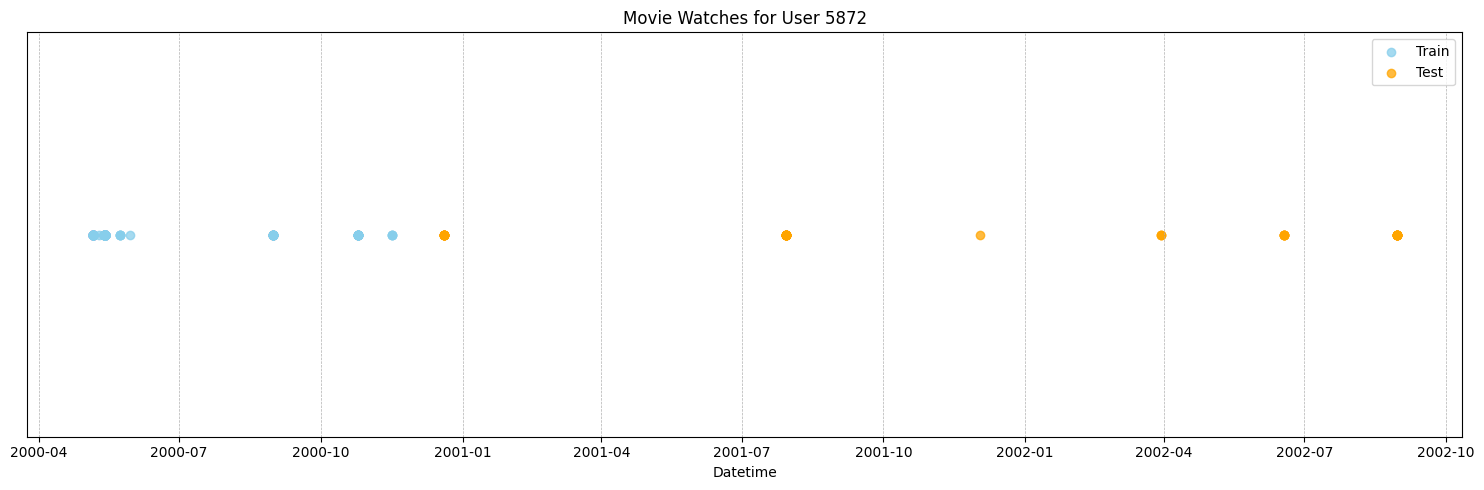

In [ ]:
full_data =  pd.concat([df_train, df_test, df_valid], ignore_index=True)

# Displaying the shapes of the outputs
print("Sampled Full Data Shape:", full_data.shape)
print("Train Data Shape:", train_df.shape)
print("Test Data Shape:", test_df.shape)
# limited_interaction_data
print_statistics(full_data)
print_statistics(train_df)
print_statistics(test_df)

visualize_user_exact_interaction(train_df, test_df)


In [ ]:
import pandas as pd

def prepare_data_with_item_id_dict(train_df, test_df, item_data):
    """
    Prepares movie data for recommendation algorithms by creating a dictionary
    with itemId as keys mapping to {'title': ..., 'genres': ...}.

    Parameters:
    - train_df (pd.DataFrame): Training data set containing at least 'userId', 'itemId'.
    - test_df (pd.DataFrame): Testing data set containing at least 'userId', 'itemId'.
    - item_data (pd.DataFrame): Item data set containing 'itemId', 'title', 'genres'.

    Returns:
    - dict: A dictionary with itemId as keys and {'title': ..., 'genres': ...} as values.
    - pd.DataFrame: Updated training data frame with type-casted 'userId', 'itemId'.
    - pd.DataFrame: Updated testing data frame with type-casted 'userId', 'itemId'.
    """
    # Ensure 'userId' and 'itemId' are integers in the training and testing DataFrames
    train_df['userId'] = train_df['userId'].astype(int)
    train_df['itemId'] = train_df['itemId'].astype(int)
    test_df['userId'] = test_df['userId'].astype(int)
    test_df['itemId'] = test_df['itemId'].astype(int)

    # Create a dictionary with itemId as the key mapping to {'title': ..., 'genres': ...}
    item_dict = item_data.set_index('itemId').to_dict('index')

    return item_dict, train_df, test_df

# You would call the function with the train_df, test_df, and item_data dataframes like so:
item_dict, train_df, test_df = prepare_data_with_item_id_dict(train_df, test_df, df_item)

item_dict

{1: {'title': 'Toy Story (1995)', 'genres': "Animation|Children's|Comedy"},
 2: {'title': 'Jumanji (1995)', 'genres': "Adventure|Children's|Fantasy"},
 3: {'title': 'Grumpier Old Men (1995)', 'genres': 'Comedy|Romance'},
 4: {'title': 'Waiting to Exhale (1995)', 'genres': 'Comedy|Drama'},
 5: {'title': 'Father of the Bride Part II (1995)', 'genres': 'Comedy'},
 6: {'title': 'Heat (1995)', 'genres': 'Action|Crime|Thriller'},
 7: {'title': 'Sabrina (1995)', 'genres': 'Comedy|Romance'},
 8: {'title': 'Tom and Huck (1995)', 'genres': "Adventure|Children's"},
 9: {'title': 'Sudden Death (1995)', 'genres': 'Action'},
 10: {'title': 'GoldenEye (1995)', 'genres': 'Action|Adventure|Thriller'},
 11: {'title': 'American President, The (1995)',
  'genres': 'Comedy|Drama|Romance'},
 12: {'title': 'Dracula: Dead and Loving It (1995)',
  'genres': 'Comedy|Horror'},
 13: {'title': 'Balto (1995)', 'genres': "Animation|Children's"},
 14: {'title': 'Nixon (1995)', 'genres': 'Drama'},
 15: {'title': 'Cutt

In [ ]:
train_df

userId  itemId  rating  timestamp
0          19    2527       3  978146700
1          19     593       5  978146713
2          19     527       3  978146727
3          19    2115       3  978146747
4          19    1210       4  978146747
...       ...     ...     ...        ...
16752    6031    1394       2  956718223
16753    6031       8       5  956718223
16754    6031    1097       5  956718288
16755    6031     361       4  956718288
16756    6031    1210       5  956718357

[16757 rows x 4 columns]

In [ ]:
display(train_df)
display(test_df)
display(full_data)

# Merge user information based on 'userId'
train_df = pd.merge(train_df, user_df, on='userId', how='inner')
test_df = pd.merge(test_df, user_df, on='userId', how='inner')
full_data = pd.merge(full_data, user_df, on='userId', how='inner')



display(train_df)
display(test_df)
display(full_data)
# Define the mapping dictionary
gender_map = {
    'F': 'Female',
    'M': 'Male'
}

# Apply the mapping
train_df['gender'] = train_df['gender'].map(gender_map)
test_df['gender'] = test_df['gender'].map(gender_map)
full_data['gender'] = full_data['gender'].map(gender_map)


display(train_df)
display(test_df)
display(full_data)

userId  itemId  rating  timestamp
0          19    2527       3  978146700
1          19     593       5  978146713
2          19     527       3  978146727
3          19    2115       3  978146747
4          19    1210       4  978146747
...       ...     ...     ...        ...
16752    6031    1394       2  956718223
16753    6031       8       5  956718223
16754    6031    1097       5  956718288
16755    6031     361       4  956718288
16756    6031    1210       5  956718357

[16757 rows x 4 columns]

userId  itemId  rating  timestamp
0         19    1911       3  979429033
1         19    2959       5  979429125
2         19    3510       5  979429182
3         19    2719       3  979429270
4         19     785       4  979429334
...      ...     ...     ...        ...
4225    6031    3418       4  956718489
4226    6031    1240       4  956718510
4227    6031    1376       5  956718549
4228    6031     364       4  956718589
4229    6031    1584       5  956718589

[4230 rows x 4 columns]

userId  itemId  rating  timestamp
0          3032    3729       5  970350736
1          2166    2804       3  974615266
2          1311     858       5  974788948
3          5485    1527       3  959833692
4          3410    1616       2  978794301
...         ...     ...     ...        ...
1000204    2886     434       5  972149471
1000205    1645    1517       5  988253224
1000206     839     524       4  980999389
1000207    1880    1584       3  974703996
1000208    2389    1527       4  974300707

[1000209 rows x 4 columns]

userId  itemId  rating  timestamp gender  age  occupation zipCode
0          19    2527       3  978146700      M    1          10   48073
1          19     593       5  978146713      M    1          10   48073
2          19     527       3  978146727      M    1          10   48073
3          19    2115       3  978146747      M    1          10   48073
4          19    1210       4  978146747      M    1          10   48073
...       ...     ...     ...        ...    ...  ...         ...     ...
16752    6031    1394       2  956718223      F   18           0   45123
16753    6031       8       5  956718223      F   18           0   45123
16754    6031    1097       5  956718288      F   18           0   45123
16755    6031     361       4  956718288      F   18           0   45123
16756    6031    1210       5  956718357      F   18           0   45123

[16757 rows x 8 columns]

userId  itemId  rating  timestamp gender  age  occupation zipCode
0         19    1911       3  979429033      M    1          10   48073
1         19    2959       5  979429125      M    1          10   48073
2         19    3510       5  979429182      M    1          10   48073
3         19    2719       3  979429270      M    1          10   48073
4         19     785       4  979429334      M    1          10   48073
...      ...     ...     ...        ...    ...  ...         ...     ...
4225    6031    3418       4  956718489      F   18           0   45123
4226    6031    1240       4  956718510      F   18           0   45123
4227    6031    1376       5  956718549      F   18           0   45123
4228    6031     364       4  956718589      F   18           0   45123
4229    6031    1584       5  956718589      F   18           0   45123

[4230 rows x 8 columns]

userId  itemId  rating  timestamp gender  age  occupation zipCode
0          3032    3729       5  970350736      M   25           0   47303
1          3032    2364       5  970343650      M   25           0   47303
2          3032    1194       5  970347926      M   25           0   47303
3          3032     455       5  970345422      M   25           0   47303
4          3032    3661       4  970358827      M   25           0   47303
...         ...     ...     ...        ...    ...  ...         ...     ...
1000204    4871    3176       4  962815864      M   18          12   04096
1000205    4871    3175       3  962815864      M   18          12   04096
1000206    4871    3452       5  962816118      M   18          12   04096
1000207    4871    3450       3  962815730      M   18          12   04096
1000208    4871    2995       3  962815916      M   18          12   04096

[1000209 rows x 8 columns]

userId  itemId  rating  timestamp  gender  age  occupation zipCode
0          19    2527       3  978146700    Male    1          10   48073
1          19     593       5  978146713    Male    1          10   48073
2          19     527       3  978146727    Male    1          10   48073
3          19    2115       3  978146747    Male    1          10   48073
4          19    1210       4  978146747    Male    1          10   48073
...       ...     ...     ...        ...     ...  ...         ...     ...
16752    6031    1394       2  956718223  Female   18           0   45123
16753    6031       8       5  956718223  Female   18           0   45123
16754    6031    1097       5  956718288  Female   18           0   45123
16755    6031     361       4  956718288  Female   18           0   45123
16756    6031    1210       5  956718357  Female   18           0   45123

[16757 rows x 8 columns]

userId  itemId  rating  timestamp  gender  age  occupation zipCode
0         19    1911       3  979429033    Male    1          10   48073
1         19    2959       5  979429125    Male    1          10   48073
2         19    3510       5  979429182    Male    1          10   48073
3         19    2719       3  979429270    Male    1          10   48073
4         19     785       4  979429334    Male    1          10   48073
...      ...     ...     ...        ...     ...  ...         ...     ...
4225    6031    3418       4  956718489  Female   18           0   45123
4226    6031    1240       4  956718510  Female   18           0   45123
4227    6031    1376       5  956718549  Female   18           0   45123
4228    6031     364       4  956718589  Female   18           0   45123
4229    6031    1584       5  956718589  Female   18           0   45123

[4230 rows x 8 columns]

userId  itemId  rating  timestamp gender  age  occupation zipCode
0          3032    3729       5  970350736   Male   25           0   47303
1          3032    2364       5  970343650   Male   25           0   47303
2          3032    1194       5  970347926   Male   25           0   47303
3          3032     455       5  970345422   Male   25           0   47303
4          3032    3661       4  970358827   Male   25           0   47303
...         ...     ...     ...        ...    ...  ...         ...     ...
1000204    4871    3176       4  962815864   Male   18          12   04096
1000205    4871    3175       3  962815864   Male   18          12   04096
1000206    4871    3452       5  962816118   Male   18          12   04096
1000207    4871    3450       3  962815730   Male   18          12   04096
1000208    4871    2995       3  962815916   Male   18          12   04096

[1000209 rows x 8 columns]

In [ ]:
item_dict

{1: {'title': 'Toy Story (1995)', 'genres': "Animation|Children's|Comedy"},
 2: {'title': 'Jumanji (1995)', 'genres': "Adventure|Children's|Fantasy"},
 3: {'title': 'Grumpier Old Men (1995)', 'genres': 'Comedy|Romance'},
 4: {'title': 'Waiting to Exhale (1995)', 'genres': 'Comedy|Drama'},
 5: {'title': 'Father of the Bride Part II (1995)', 'genres': 'Comedy'},
 6: {'title': 'Heat (1995)', 'genres': 'Action|Crime|Thriller'},
 7: {'title': 'Sabrina (1995)', 'genres': 'Comedy|Romance'},
 8: {'title': 'Tom and Huck (1995)', 'genres': "Adventure|Children's"},
 9: {'title': 'Sudden Death (1995)', 'genres': 'Action'},
 10: {'title': 'GoldenEye (1995)', 'genres': 'Action|Adventure|Thriller'},
 11: {'title': 'American President, The (1995)',
  'genres': 'Comedy|Drama|Romance'},
 12: {'title': 'Dracula: Dead and Loving It (1995)',
  'genres': 'Comedy|Horror'},
 13: {'title': 'Balto (1995)', 'genres': "Animation|Children's"},
 14: {'title': 'Nixon (1995)', 'genres': 'Drama'},
 15: {'title': 'Cutt

In [ ]:
# Check for duplicated userId, itemId pairs in full data
duplicates = full_data.duplicated(subset=['userId', 'itemId'], keep=False)
if duplicates.any():
    print("There are duplicated userId, itemId pairs.")
    # Optional: To see the actual duplicated rows
    print(full_data[duplicates])
else:
    print("No duplicated userId, itemId pairs found.")


No duplicated userId, itemId pairs found.


In [ ]:
train_df

userId  itemId  rating  timestamp  gender  age  occupation zipCode
0          19    2527       3  978146700    Male    1          10   48073
1          19     593       5  978146713    Male    1          10   48073
2          19     527       3  978146727    Male    1          10   48073
3          19    2115       3  978146747    Male    1          10   48073
4          19    1210       4  978146747    Male    1          10   48073
...       ...     ...     ...        ...     ...  ...         ...     ...
16752    6031    1394       2  956718223  Female   18           0   45123
16753    6031       8       5  956718223  Female   18           0   45123
16754    6031    1097       5  956718288  Female   18           0   45123
16755    6031     361       4  956718288  Female   18           0   45123
16756    6031    1210       5  956718357  Female   18           0   45123

[16757 rows x 8 columns]

## Data Visualization

Mean Age: 32.00 years


userId  itemId  rating  timestamp  gender  age  occupation zipCode  \
0          19    2527       3  978146700    Male    1          10   48073   
1          19     593       5  978146713    Male    1          10   48073   
2          19     527       3  978146727    Male    1          10   48073   
3          19    2115       3  978146747    Male    1          10   48073   
4          19    1210       4  978146747    Male    1          10   48073   
...       ...     ...     ...        ...     ...  ...         ...     ...   
16752    6031    1394       2  956718223  Female   18           0   45123   
16753    6031       8       5  956718223  Female   18           0   45123   
16754    6031    1097       5  956718288  Female   18           0   45123   
16755    6031     361       4  956718288  Female   18           0   45123   
16756    6031    1210       5  956718357  Female   18           0   45123   

                   age_group  
0      Early Adult (≤32 yrs)  
1      Early Adult (≤32 yrs)  
2      Early Adult (≤32 yrs)  
3      Early Adult (≤32 yrs)  
4      Early Adult (≤32 yrs)  
...                      ...  
16752  Early Adult (≤32 yrs)  
16753  Early Adult (≤32 yrs)  
16754  Early Adult (≤32 yrs)  
16755  Early Adult (≤32 yrs)  
16756  Early Adult (≤32 yrs)  

[16757 rows x 9 columns]

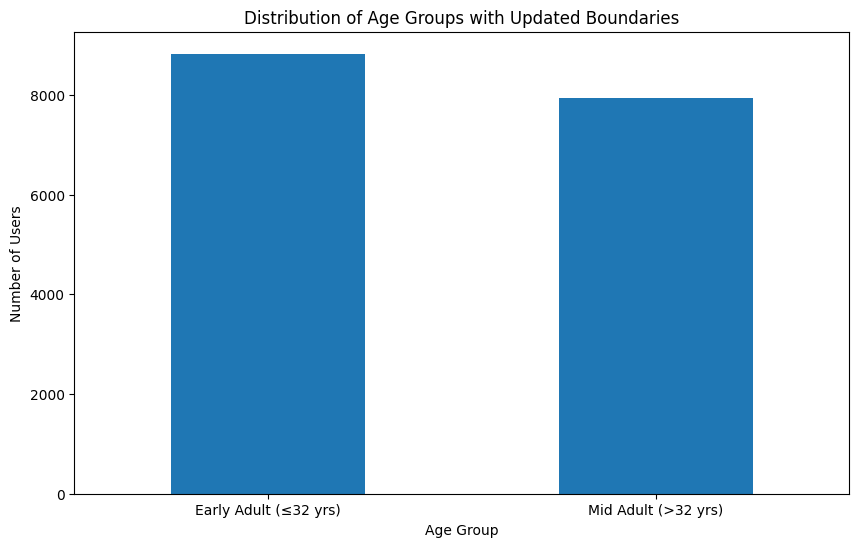

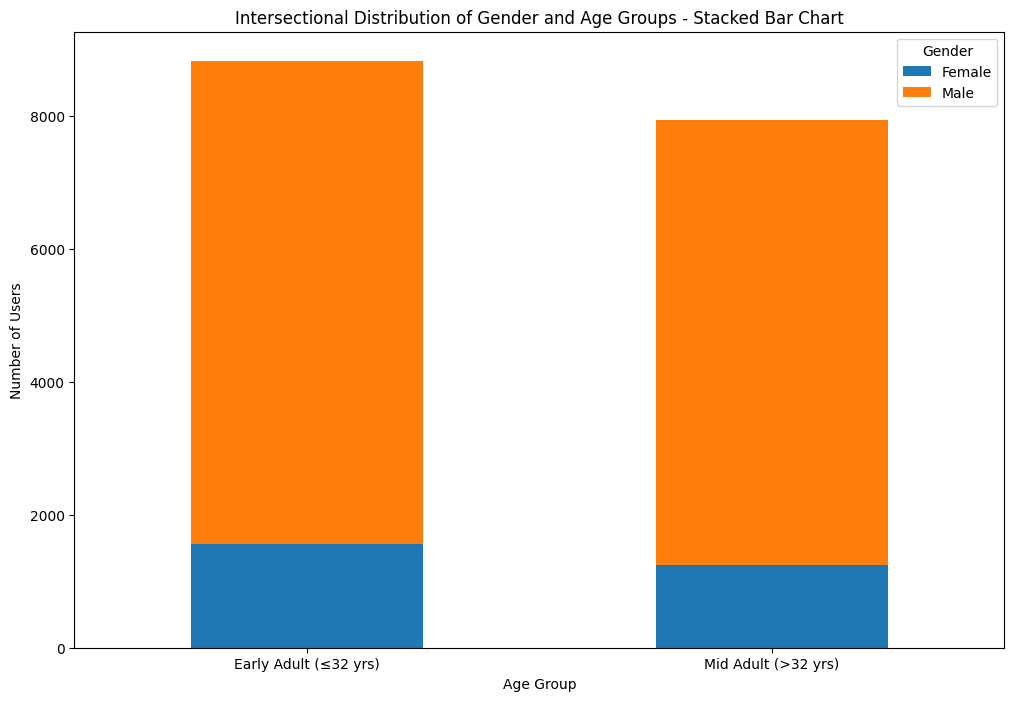

userId  itemId  rating  timestamp  gender  age  occupation zipCode  \
0          19    2527       3  978146700    Male    1          10   48073   
1        1420    2527       4  974759975    Male   18           4   01375   
2        1733    2527       4  977462127    Male   18          14   43725   
3        3618    2527       3  966598290    Male   56          17   22657   
4        3841    2527       5  965995414    Male   45          18   26101   
...       ...     ...     ...        ...     ...  ...         ...     ...   
16752    5888    3142       3  957481400    Male   25          20   64114   
16753    5888    2092       3  957481450    Male   25          20   64114   
16754    5972    2264       3  959717871  Female   25          20   55428   
16755    6031     558       4  956717774  Female   18           0   45123   
16756    6031       8       5  956718223  Female   18           0   45123   

                   age_group                        title  \
0      Early Adult (≤32 yrs)             Westworld (1973)   
1      Early Adult (≤32 yrs)             Westworld (1973)   
2      Early Adult (≤32 yrs)             Westworld (1973)   
3        Mid Adult (>32 yrs)             Westworld (1973)   
4        Mid Adult (>32 yrs)             Westworld (1973)   
...                      ...                          ...   
16752  Early Adult (≤32 yrs)    U2: Rattle and Hum (1988)   
16753  Early Adult (≤32 yrs)  Return of Jafar, The (1993)   
16754  Early Adult (≤32 yrs)       We're No Angels (1989)   
16755  Early Adult (≤32 yrs)       Pagemaster, The (1994)   
16756  Early Adult (≤32 yrs)          Tom and Huck (1995)   

                                              genres  
0                     Action|Sci-Fi|Thriller|Western  
1                     Action|Sci-Fi|Thriller|Western  
2                     Action|Sci-Fi|Thriller|Western  
3                     Action|Sci-Fi|Thriller|Western  
4                     Action|Sci-Fi|Thriller|Western  
...                                              ...  
16752                            Documentary|Musical  
16753                   Animation|Children's|Musical  
16754                                          Drama  
16755  Action|Adventure|Animation|Children's|Fantasy  
16756                           Adventure|Children's  

[16757 rows x 11 columns]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to categorize age
def categorize_age(age, mean_age):
    if age <= mean_age:
        return f"Early Adult (≤{int(mean_age)} yrs)"
    else:
        return f"Mid Adult (>{int(mean_age)} yrs)"

# Calculating the mean age
mean_age = round(train_df['age'].mean())
print(f"Mean Age: {mean_age:.2f} years")

# Applying the function to categorize ages
train_df['age_group'] = train_df['age'].apply(lambda x: categorize_age(x, mean_age))
display(train_df)
# Plotting the distributions
plt.figure(figsize=(10, 6))
age_group_distribution = train_df['age_group'].value_counts()
sorted_age_groups = age_group_distribution[[f'Early Adult (≤{round(mean_age)} yrs)', f'Mid Adult (>{round(mean_age)} yrs)']]
sorted_age_groups.plot(kind='bar')
plt.title('Distribution of Age Groups with Updated Boundaries')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()

# Creating a pivot table and plotting it
pivot_data = train_df.pivot_table(index='age_group', columns='gender', values='userId', aggfunc='size', fill_value=0)
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Intersectional Distribution of Gender and Age Groups - Stacked Bar Chart')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()


# Merge user information based on 'userId'
train_df = pd.merge(train_df, item_df, on='itemId', how='inner')
test_df = pd.merge(test_df, item_df, on='itemId', how='inner')
full_data = pd.merge(full_data, item_df, on='itemId', how='inner')
display(train_df)


In [ ]:
train_df

userId  itemId  rating  timestamp  gender  age  occupation zipCode  \
0          19    2527       3  978146700    Male    1          10   48073   
1        1420    2527       4  974759975    Male   18           4   01375   
2        1733    2527       4  977462127    Male   18          14   43725   
3        3618    2527       3  966598290    Male   56          17   22657   
4        3841    2527       5  965995414    Male   45          18   26101   
...       ...     ...     ...        ...     ...  ...         ...     ...   
16752    5888    3142       3  957481400    Male   25          20   64114   
16753    5888    2092       3  957481450    Male   25          20   64114   
16754    5972    2264       3  959717871  Female   25          20   55428   
16755    6031     558       4  956717774  Female   18           0   45123   
16756    6031       8       5  956718223  Female   18           0   45123   

                   age_group                        title  \
0      Early Adult (≤32 yrs)             Westworld (1973)   
1      Early Adult (≤32 yrs)             Westworld (1973)   
2      Early Adult (≤32 yrs)             Westworld (1973)   
3        Mid Adult (>32 yrs)             Westworld (1973)   
4        Mid Adult (>32 yrs)             Westworld (1973)   
...                      ...                          ...   
16752  Early Adult (≤32 yrs)    U2: Rattle and Hum (1988)   
16753  Early Adult (≤32 yrs)  Return of Jafar, The (1993)   
16754  Early Adult (≤32 yrs)       We're No Angels (1989)   
16755  Early Adult (≤32 yrs)       Pagemaster, The (1994)   
16756  Early Adult (≤32 yrs)          Tom and Huck (1995)   

                                              genres  
0                     Action|Sci-Fi|Thriller|Western  
1                     Action|Sci-Fi|Thriller|Western  
2                     Action|Sci-Fi|Thriller|Western  
3                     Action|Sci-Fi|Thriller|Western  
4                     Action|Sci-Fi|Thriller|Western  
...                                              ...  
16752                            Documentary|Musical  
16753                   Animation|Children's|Musical  
16754                                          Drama  
16755  Action|Adventure|Animation|Children's|Fantasy  
16756                           Adventure|Children's  

[16757 rows x 11 columns]

# **OpenAI Experiments**

## 1. Prompt generation

In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.6/311.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from datetime import datetime
import pandas as pd

def generate_demographic_prompt(user_id, user_info_df, user_info, counterfactual):
    if user_info_df is None or user_info_df.empty or user_info is None:
        return "The user has watched the following movies:\n"

    user_demo = user_info_df[user_info_df['userId'] == user_id].iloc[0]
    gender_desc = user_demo['gender']
    age_group_desc = user_demo['age_group']

    if counterfactual:
        if user_info in ['gender', 'intersectional']:
            gender_desc = "Female" if gender_desc.lower() == "male" else "Male"
        if user_info in ['age-group', 'intersectional']:
            age_group_desc = "Mid Adult (> 32 yrs)" if age_group_desc == "Early Adult (<= 32 yrs)" else "Early Adult (<= 32 yrs)"

    descriptors = ''
    if user_info == 'gender':
        descriptors = f"The user is {gender_desc}."
    elif user_info == 'age-group':
        descriptors = f"The user is in the {age_group_desc} age group."
    elif user_info == 'intersectional':
        descriptors = f"The user is a {gender_desc} in the {age_group_desc} age group."

    return f"{descriptors} The user has watched the following movies:\n"

def passion_profile_generator(profile_prompt, user_movies):
    movie_list = '\n'.join([
        f"- \"{movie['title']}\" in genre(s) {movie['genres']} with rating {movie.get('rating', 'N/A')}"  # Use .get() with default value 'N/A'
        for movie in user_movies
    ])
    return f"{profile_prompt}\n{movie_list}\nThis selection reflects the user's movie preferences."


def generate_interaction_prompt(model, user_movies, context_length=10, top_k=3):
    """
    Generates an interaction profile based on the specified model and the user's movie history,
    focusing on the last movies for Few-shot context.
    """
    if model == 'zero-shot':
        sorted_movies = sorted(user_movies, key=lambda x: x['timestamp'], reverse=True)
        print(sorted_movies)
        context_movies = sorted_movies[:context_length]
        movie_listing = '\n'.join([f"{i+1}. \"{movie['title']}\" in genre(s) {movie['genres']} with rating {movie['rating']}" for i, movie in enumerate(reversed(context_movies))])
        if top_k == 1:
            return f"Given the user's recent viewing history listed below, \n{movie_listing}\nwhich movie would be a suitable next recommendation?"
        else:
            return f"Given the user's recent viewing history listed below, \n{movie_listing}\nwhat would be the top-{top_k} suitable next recommendations?"
    elif model.startswith('ICL-Few-shot-'):
        shot_count = int(model.split('-')[-1])
        if len(user_movies) < context_length + shot_count:
            return "Not enough movies to generate a Few-shot profile."

        sorted_movies = sorted(user_movies, key=lambda x: x['timestamp'], reverse=True)
        context_movies = sorted_movies[shot_count:context_length+shot_count]
        example_movies = sorted_movies[:shot_count]

        context_list = '\n'.join([f"{i+1}. \"{movie['title']}\" in genre(s) {movie['genres']} with rating {movie['rating']}" for i, movie in enumerate(reversed(context_movies))])
        example_statements = "\n".join([f"Recommendation {i+1}: \"{movie['title']}\" in genre(s) {movie['genres']} with rating {movie['rating']}" for i, movie in enumerate(example_movies)])

        query_statement = f"Given the user has recently watched the following movies in order:\n{context_list}\nYou should recommend:\n{example_statements}"
        if top_k == 1:
            query_statement += f"\nWhat would be a suitable next recommendation after the above movies?"
        else:
            query_statement += f"\nWhat would be the top-{top_k} suitable next recommendations after the above movies?"

        return query_statement

import pandas as pd
from datetime import datetime

def userProfile_Prompt_Gen(user_id, df_train, num_movies, sampling_strategy, user_info_df, user_info, counterfactual, interaction_model, context_length, top_k):
    np.random.seed(0)
    user_watched_movies = df_train[df_train['userId'] == user_id].copy()

    if user_watched_movies.empty:
        return "No movies watched by the user."

    current_timestamp = pd.to_datetime("now")


    if sampling_strategy == 'random':
        sampled_movies = user_watched_movies.sample(n=min(num_movies, len(user_watched_movies)), replace=False)
    elif sampling_strategy == 'frequent':
        sampled_movies = user_watched_movies.sort_values(by='rating', ascending=False).head(num_movies)
    elif sampling_strategy == 'recent-frequent':
        # Ensure the timestamps are in datetime format
        user_watched_movies['timestamp'] = pd.to_datetime(user_watched_movies['timestamp'])

        # Calculate recency in days
        user_watched_movies['recency_score'] = (current_timestamp - user_watched_movies['timestamp']).dt.total_seconds() / 86400
        user_watched_movies['normalized_count'] = (user_watched_movies['rating'] - user_watched_movies['rating'].min()) / (user_watched_movies['rating'].max() - user_watched_movies['rating'].min())
        user_watched_movies['normalized_recency'] = 1 - ((user_watched_movies['recency_score'] - user_watched_movies['recency_score'].min()) / (user_watched_movies['recency_score'].max() - user_watched_movies['recency_score'].min()))

        # Weights can be adjusted based on preference or experimental outcome
        recency_weight = 0.65
        count_weight = 0.35

        # Calculate combined score
        user_watched_movies['combined_score'] = (recency_weight * user_watched_movies['normalized_recency']) + (count_weight * user_watched_movies['normalized_count'])
        sampled_movies = user_watched_movies.nlargest(num_movies, 'combined_score')
    else:
        # Handle other sampling strategies here
        sampled_movies = user_watched_movies.sample(n=min(num_movies, len(user_watched_movies)), replace=False)

    sampled_movies_info = [{'title': movie['title'], 'genres': movie['genres'], 'rating': movie['rating'], 'timestamp': movie['timestamp']} for _, movie in sampled_movies.iterrows()]
    all_movies = [{'title': movie['title'], 'genres': movie['genres'], 'rating': movie['rating'], 'timestamp': movie['timestamp']} for _, movie in user_watched_movies.iterrows()]

    profile_prompt = generate_demographic_prompt(user_id, user_info_df, user_info, counterfactual)
    passion_profile = passion_profile_generator(profile_prompt, sampled_movies_info)
    interaction_prompt = generate_interaction_prompt(interaction_model, all_movies, context_length, top_k)

    return f"{passion_profile}\n{interaction_prompt}"


# Example DataFrame setup and function call are assumed to be properly implemented as before.


# Test Execution
user_id = 19
num_movies = 5
counterfactual = False  # Testing counterfactual changes
context_length = 5  # define as needed
top_k = 3  # define as needed

# Define parameters for testing
sampling_strategy_list = ['random', 'frequent', 'recent-frequent']
sampling_strategy_list = ['random']
user_infos_list = [None, 'gender', 'age-group', 'intersectional']

counterfactual_list = [False, True]
interaction_model_options = ['zero-shot', 'ICL-Few-shot-1', 'ICL-Few-shot-2']

user_infos_list = [None, 'gender']
counterfactual_list = [False]

df_train = train_df.copy()
# Example DataFrame setup
# df_train = pd.DataFrame({
#     'userId': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2],
#     'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie F', 'Movie G', 'Movie E', 'Movie F', 'Movie G', 'Movie H', 'Movie K', 'Movie L'],
#     'genres': ['Action', 'Comedy', 'Drama', 'Horror', 'Sci-fi', 'Horror', 'Comedy', 'Drama', 'Horror', 'Action','Sci-fi','Romance'],
#     'rating': [1, 5, 3, 5, 5, 2, 4, 4, 5, 3, 5, 4],
#     'timestamp': [datetime.now() - timedelta(days=n) for n in range(12)]
# })

# user_info_df = pd.DataFrame({
#     'userId': [1, 2],
#     'gender': ['Male', 'Female'],
#     'age_group': ['Early Adult (<=32 yrs)', 'Mid Adult (>32 yrs)']
# })

user_info_df = df_train[['userId', 'gender', 'age_group']].drop_duplicates()
display(df_train)
user_demo = user_info_df[user_info_df['userId'] == user_id].iloc[0]
display(user_demo)

# Test Execution Loop
for counterfactual in counterfactual_list:
    for sampling_strategy in sampling_strategy_list:
        for user_info in user_infos_list:
            for interaction_model in interaction_model_options:
                profile_output = userProfile_Prompt_Gen(
                    user_id, df_train, num_movies, sampling_strategy, user_info_df, user_info, counterfactual, interaction_model, context_length, top_k
                )
                print(profile_output)


userId  itemId  rating  timestamp  gender  age  occupation zipCode  \
0          19    2527       3  978146700    Male    1          10   48073   
1        1420    2527       4  974759975    Male   18           4   01375   
2        1733    2527       4  977462127    Male   18          14   43725   
3        3618    2527       3  966598290    Male   56          17   22657   
4        3841    2527       5  965995414    Male   45          18   26101   
...       ...     ...     ...        ...     ...  ...         ...     ...   
16752    5888    3142       3  957481400    Male   25          20   64114   
16753    5888    2092       3  957481450    Male   25          20   64114   
16754    5972    2264       3  959717871  Female   25          20   55428   
16755    6031     558       4  956717774  Female   18           0   45123   
16756    6031       8       5  956718223  Female   18           0   45123   

                   age_group                        title  \
0      Early Adult (≤32 yrs)             Westworld (1973)   
1      Early Adult (≤32 yrs)             Westworld (1973)   
2      Early Adult (≤32 yrs)             Westworld (1973)   
3        Mid Adult (>32 yrs)             Westworld (1973)   
4        Mid Adult (>32 yrs)             Westworld (1973)   
...                      ...                          ...   
16752  Early Adult (≤32 yrs)    U2: Rattle and Hum (1988)   
16753  Early Adult (≤32 yrs)  Return of Jafar, The (1993)   
16754  Early Adult (≤32 yrs)       We're No Angels (1989)   
16755  Early Adult (≤32 yrs)       Pagemaster, The (1994)   
16756  Early Adult (≤32 yrs)          Tom and Huck (1995)   

                                              genres  
0                     Action|Sci-Fi|Thriller|Western  
1                     Action|Sci-Fi|Thriller|Western  
2                     Action|Sci-Fi|Thriller|Western  
3                     Action|Sci-Fi|Thriller|Western  
4                     Action|Sci-Fi|Thriller|Western  
...                                              ...  
16752                            Documentary|Musical  
16753                   Animation|Children's|Musical  
16754                                          Drama  
16755  Action|Adventure|Animation|Children's|Fantasy  
16756                           Adventure|Children's  

[16757 rows x 11 columns]

userId                          19
gender                        Male
age_group    Early Adult (≤32 yrs)
Name: 0, dtype: object

[{'title': 'Bowfinger (1999)', 'genres': 'Comedy', 'rating': 3, 'timestamp': 979428956}, {'title': 'Arlington Road (1999)', 'genres': 'Thriller', 'rating': 4, 'timestamp': 979428881}, {'title': 'Austin Powers: The Spy Who Shagged Me (1999)', 'genres': 'Comedy', 'rating': 4, 'timestamp': 979428881}, {'title': 'Sixth Sense, The (1999)', 'genres': 'Thriller', 'rating': 5, 'timestamp': 979427947}, {'title': 'Bringing Out the Dead (1999)', 'genres': 'Drama|Horror', 'rating': 5, 'timestamp': 978850058}, {'title': 'Face/Off (1997)', 'genres': 'Action|Sci-Fi|Thriller', 'rating': 4, 'timestamp': 978557492}, {'title': 'Strange Days (1995)', 'genres': 'Action|Crime|Sci-Fi', 'rating': 3, 'timestamp': 978557492}, {'title': 'Contact (1997)', 'genres': 'Drama|Sci-Fi', 'rating': 3, 'timestamp': 978557438}, {'title': 'Alien Nation (1988)', 'genres': 'Crime|Drama|Sci-Fi', 'rating': 3, 'timestamp': 978557438}, {'title': 'Dune (1984)', 'genres': 'Fantasy|Sci-Fi', 'rating': 3, 'timestamp': 978557357}, {'ti

In [ ]:
run_openAI_experiments

0

# Run Prompt Generation for ALL Users in Train Dataset  

In [ ]:
import pandas as pd

# Assuming 'df_train' is already defined as your initial DataFrame containing movie data
# Define parameters for testing
sampling_strategy_list = ['random', 'frequent', 'recent-frequent']
user_infos_list = [None, 'gender', 'age-group', 'intersectional']
counterfactual_list = [False, True]
interaction_model_options = ['zero-shot', 'ICL-Few-shot-1', 'ICL-Few-shot-2']
num_movies = 10
context_length = 5
top_k = 3
# Create a new DataFrame to store results grouped by user ID
prompt_df = pd.DataFrame()

for user_id in df_train['userId'].unique():
    # Extract user-specific data
    user_data = df_train[df_train['userId'] == user_id]
    # Basic user info
    gender = user_data['gender'].iloc[0]
    age_group = user_data['age_group'].iloc[0]
    movieIds = list(user_data['itemId'].unique())  # List of unique movie IDs for the user

    # Initialize the row to append to prompt_df
    row = pd.DataFrame({
        'userId': [user_id],
        'gender': [gender],
        'age_group': [age_group],
        'movieIds': [movieIds]
    })

    # Generate prompts based on various scenarios
    for counterfactual in counterfactual_list:
        for sampling_strategy in sampling_strategy_list:
            for user_info in user_infos_list:
                for interaction_model in interaction_model_options:
                    column_name = f"prompt_counterfact-{counterfactual}_sample-{sampling_strategy}_userDemo-{user_info}_interact-{interaction_model}".replace('None', 'no_info')
                    profile_output = userProfile_Prompt_Gen(
                        user_id, df_train, num_movies, sampling_strategy, user_info_df, user_info, counterfactual, interaction_model, context_length=context_length, top_k=top_k
                    )
                    print(profile_output)
                    row[column_name] = [profile_output]  # Add the prompt to the row

    # Append the generated row to the results DataFrame
    prompt_df = pd.concat([prompt_df, row], ignore_index=True)

# Display the first few rows of the results DataFrame
print(prompt_df.head())
if load_trained_data == 0:
# Optionally, save the updated dataframe to a new CSV file
  prompt_df.to_csv(f"train_prompt_df_movies_{flag_ds}_fullInteraction_users_nMovie{num_movies}_lContext{context_length}_top_{top_k}.csv", index=False)
else:
  base_url = "https://raw.githubusercontent.com/yasdel/Benchmark_RecLLM_Fairness/main/data/"
  file = f"train_prompt_df_movies_{flag_ds}_fullInteraction_users_nMovie{num_movies}_lContext{context_length}_top_{top_k}.csv"
  RecLLM_df = download_csv_from_github(base_url + file, file)


Streaming output truncated to the last 5000 lines.
3. "Eraserhead (1977)" in genre(s) Drama|Horror with rating 3
4. "Breaking Away (1979)" in genre(s) Drama with rating 3
5. "Loss of Sexual Innocence, The (1999)" in genre(s) Drama with rating 3
You should recommend:
Recommendation 1: "Braveheart (1995)" in genre(s) Action|Drama|War with rating 2
What would be the top-3 suitable next recommendations after the above movies?
The user is a Male in the Mid Adult (>32 yrs) age group. The user has watched the following movies:

- "Sting, The (1973)" in genre(s) Comedy|Crime with rating 5
- "To Kill a Mockingbird (1962)" in genre(s) Drama with rating 5
- "East of Eden (1955)" in genre(s) Drama with rating 5
- "Thin Blue Line, The (1988)" in genre(s) Documentary with rating 5
- "Good, The Bad and The Ugly, The (1966)" in genre(s) Action|Western with rating 5
- "E.T. the Extra-Terrestrial (1982)" in genre(s) Children's|Drama|Fantasy|Sci-Fi with rating 4
- "Country (1984)" in genre(s) Drama with 

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np

# Select a random user's index. This will choose one user at random using their integer location.
random_index = np.random.randint(0, len(prompt_df))

# Select the data for this random user
random_user_data = prompt_df.iloc[random_index]

# Print the data for this random user
print("Data for User at Random Index {}:".format(random_index))
for column, value in random_user_data.items():
    print(f"{column}: {value}")
    print("-------------------------------------------")


Data for User at Random Index 7:
userId: 5112
-------------------------------------------
gender: Male
-------------------------------------------
age_group: Mid Adult (>32 yrs)
-------------------------------------------
movieIds: [2527, 1210, 1196, 260, 1214, 1240, 2692, 1277, 2991, 2571, 2393, 2662, 3638, 2529, 1597, 2628, 1580, 1375, 3527, 2699, 2640, 648, 2490, 1371, 3717, 1909, 1644, 1374, 2694, 2716, 2841, 2700, 3176, 1307, 17, 2455, 3081, 1645, 2710, 1200, 1127, 2987, 741, 2599, 3471, 1097, 1206, 1270, 2021, 1584, 3701, 1573, 198, 2762, 2683, 2770, 904, 2858, 2186, 903, 2010, 930, 924, 1269, 2997, 2396, 3334, 969, 1092, 866, 2076, 2206, 1086, 2070, 32, 2916, 3044, 3576, 3386, 480, 3203, 2117, 316, 3699, 2009, 3032, 1625, 2660, 1252, 912, 3435, 589, 1267, 1393, 2664, 1653, 1247, 3683, 2706, 3285, 3016, 2722, 1093, 2605, 2712, 233, 2580, 3578, 913, 2581, 2901, 968, 1513, 3512, 2395, 2012, 780, 1676, 1391, 1248, 1617, 1212, 1274, 3476, 1129, 2288, 1459, 1805, 1876, 1320, 2851, 191

In [ ]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client with your API key
client = OpenAI(api_key=api_key)

def get_recommendation(prompt):
    system_message = {"role": "system", "content": "Given a user, act like a Recommender System."}
    user_message = {"role": "user", "content": prompt}
    messages = [system_message, user_message]

    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=1500,
        temperature=0
    )
    # Correctly accessing properties of the response object
    recommendation = response.choices[0].message.content.strip()  # Use dot notation to access 'content'
    return recommendation


sample_user_df = prompt_df.copy()

if run_openAI_experiments == 1:
  # Initialize an empty DataFrame for recommendations
  recommendations_df = pd.DataFrame(index=sample_user_df.index)

  # Iterate over the columns for which you need to generate recommendations (4th column onwards)
  for column in sample_user_df.columns[5:]:
      recommendations = []  # This will hold the column data until ready to assign to DataFrame

      # Iterate over each row in the DataFrame
      for index, row in sample_user_df.iterrows():
          prompt = row[column]
          try:
              recommendation = get_recommendation(prompt)
          except Exception as e:
              recommendation = f"An error occurred: {e}"

          recommendations.append(recommendation)

          # Print a message every 10 users
          if (index + 1) % 40 == 0:
              print(f"Processed {index + 1} users for column {column}")

      # After collecting all recommendations for a column, add them to the recommendations DataFrame
      recommendations_df[f'recommendation_for_{column}'] = recommendations

  # Concatenate the original DataFrame with the new recommendations DataFrame
  RecLLM_df = pd.concat([sample_user_df, recommendations_df], axis=1)

  # Display the DataFrame with prompts and recommendations
  print(RecLLM_df)
  # Optionally, save the result to a CSV file
  RecLLM_df.to_csv(f"RecLLM_df_{flag_ds}_fullInteraction_80users_nTrack{num_movies}_lContext{context_length}_top{top_k}.csv", index=False)

else:
  # Base URL for raw files on GitHub
  base_url = "https://raw.githubusercontent.com/yasdel/Benchmark_RecLLM_Fairness/main/results/"
  file = f"RecLLM_df_{flag_ds}_fullInteraction_80users_nTrack{num_movies}_lContext{context_length}_top{top_k}.csv"
  #file = "RecLLM_df_lastFM1k_fullInteraction_80users_nTrack10_lContext5.csv"
  RecLLM_df = download_csv_from_github(base_url + file, file)
  RecLLM_df.head(10)

Successfully downloaded RecLLM_df_ml100k_fullInteraction_80users_nTrack10_lContext5_top3.csv


In [ ]:
import pandas as pd
import numpy as np

# Select a random user's index. This will choose one user at random using their integer location.
random_index = np.random.randint(0, len(RecLLM_df))

# Select the data for this random user
random_user_data = RecLLM_df.iloc[random_index]

# Print the data for this random user
print("Data for User at Random Index {}:".format(random_index))
for column, value in random_user_data.items():
    print(f"{column}: {value}")
    print("-------------------------------------------")


Data for User at Random Index 59:
userId: 2642
-------------------------------------------
gender: Male
-------------------------------------------
age_group: Early Adult (≤32 yrs)
-------------------------------------------
movieIds: [1210, 1198, 457, 2028, 2571, 1610, 733, 2353, 47, 356, 1584, 2762, 318, 608, 2858, 296, 1213, 1094, 32, 480, 1625, 2959, 589, 50, 150, 1393, 2268, 1617, 1748, 2058, 3686, 1991, 1704, 2890, 3354, 3105, 802, 1358, 3510, 3481, 3535, 3555, 3300, 1500, 3484, 3513, 3316, 3173, 2329, 3006, 1694, 628, 1061, 2469, 2378, 3252]
-------------------------------------------
prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot: The user has watched the following movies:

- "Rules of Engagement (2000)" in genre(s) Drama|Thriller with rating 4
- "Three Kings (1999)" in genre(s) Drama|War with rating 4
- "American Psycho (2000)" in genre(s) Comedy|Horror|Thriller with rating 2
- "Few Good Men, A (1992)" in genre(s) Crime|Drama with rating 4
- "Sixth 

In [ ]:
RecLLM_df

userId  gender              age_group  \
0       19    Male  Early Adult (≤32 yrs)   
1     1420    Male  Early Adult (≤32 yrs)   
2     1733    Male  Early Adult (≤32 yrs)   
3     3618    Male    Mid Adult (>32 yrs)   
4     3841    Male    Mid Adult (>32 yrs)   
..     ...     ...                    ...   
75    1177  Female  Early Adult (≤32 yrs)   
76    2394    Male    Mid Adult (>32 yrs)   
77    5751  Female  Early Adult (≤32 yrs)   
78     285  Female    Mid Adult (>32 yrs)   
79    1461  Female    Mid Adult (>32 yrs)   

                                             movieIds  \
0   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
1   [2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...   
2   [2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...   
3   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
4   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
..                                                ...   
75  [2028, 2948, 1580, 380, 3114, 1259, 2321, 2455...   
76  [1197, 10, 2628, 1220, 1580, 733, 1372, 380, 1...   
77  [2699, 3114, 2694, 2716, 2700, 3176, 3081, 112...   
78  [1259, 1090, 858, 2064, 3101, 1225, 111, 1299,...   
79  [2160, 2455, 2454, 110, 356, 2858, 903, 2791, ...   

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot  \
0   The user has watched the following movies:\n\n...                           
1   The user has watched the following movies:\n\n...                           
2   The user has watched the following movies:\n\n...                           
3   The user has watched the following movies:\n\n...                           
4   The user has watched the following movies:\n\n...                           
..                                                ...                           
75  The user has watched the following movies:\n\n...                           
76  The user has watched the following movies:\n\n...                           
77  The user has watched the following movies:\n\n...                           
78  The user has watched the following movies:\n\n...                           
79  The user has watched the following movies:\n\n...                           

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1  \
0   The user has watched the following movies:\n\n...                                
1   The user has watched the following movies:\n\n...                                
2   The user has watched the following movies:\n\n...                                
3   The user has watched the following movies:\n\n...                                
4   The user has watched the following movies:\n\n...                                
..                                                ...                                
75  The user has watched the following movies:\n\n...                                
76  The user has watched the following movies:\n\n...                                
77  The user has watched the following movies:\n\n...                                
78  The user has watched the following movies:\n\n...                                
79  The user has watched the following movies:\n\n...                                

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2  \
0   The user has watched the following movies:\n\n...                                
1   The user has watched the following movies:\n\n...                                
2   The user has watched the following movies:\n\n...                                
3   The user has watched the following movies:\n\n...                                
4   The user has watched the following movies:\n\n...                                
..                                                ...                                
75  The user has watched the following movies:\n\n...                                
76  The user has watched the following movies:\n\n...                               

#Evaluation

In [ ]:
api_key = ""

In [ ]:
RecLLM_df

userId  gender              age_group  \
0       19    Male  Early Adult (≤32 yrs)   
1     1420    Male  Early Adult (≤32 yrs)   
2     1733    Male  Early Adult (≤32 yrs)   
3     3618    Male    Mid Adult (>32 yrs)   
4     3841    Male    Mid Adult (>32 yrs)   
..     ...     ...                    ...   
75    1177  Female  Early Adult (≤32 yrs)   
76    2394    Male    Mid Adult (>32 yrs)   
77    5751  Female  Early Adult (≤32 yrs)   
78     285  Female    Mid Adult (>32 yrs)   
79    1461  Female    Mid Adult (>32 yrs)   

                                             movieIds  \
0   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
1   [2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...   
2   [2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...   
3   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
4   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
..                                                ...   
75  [2028, 2948, 1580, 380, 3114, 1259, 2321, 2455...   
76  [1197, 10, 2628, 1220, 1580, 733, 1372, 380, 1...   
77  [2699, 3114, 2694, 2716, 2700, 3176, 3081, 112...   
78  [1259, 1090, 858, 2064, 3101, 1225, 111, 1299,...   
79  [2160, 2455, 2454, 110, 356, 2858, 903, 2791, ...   

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot  \
0   The user has watched the following movies:\n\n...                           
1   The user has watched the following movies:\n\n...                           
2   The user has watched the following movies:\n\n...                           
3   The user has watched the following movies:\n\n...                           
4   The user has watched the following movies:\n\n...                           
..                                                ...                           
75  The user has watched the following movies:\n\n...                           
76  The user has watched the following movies:\n\n...                           
77  The user has watched the following movies:\n\n...                           
78  The user has watched the following movies:\n\n...                           
79  The user has watched the following movies:\n\n...                           

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1  \
0   The user has watched the following movies:\n\n...                                
1   The user has watched the following movies:\n\n...                                
2   The user has watched the following movies:\n\n...                                
3   The user has watched the following movies:\n\n...                                
4   The user has watched the following movies:\n\n...                                
..                                                ...                                
75  The user has watched the following movies:\n\n...                                
76  The user has watched the following movies:\n\n...                                
77  The user has watched the following movies:\n\n...                                
78  The user has watched the following movies:\n\n...                                
79  The user has watched the following movies:\n\n...                                

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2  \
0   The user has watched the following movies:\n\n...                                
1   The user has watched the following movies:\n\n...                                
2   The user has watched the following movies:\n\n...                                
3   The user has watched the following movies:\n\n...                                
4   The user has watched the following movies:\n\n...                                
..                                                ...                                
75  The user has watched the following movies:\n\n...                                
76  The user has watched the following movies:\n\n...                               

In [ ]:
import openai
import pandas as pd
#"content": "Please provide the recommended song and its artist from the following text in the format: \"Song Name\" by Artist."


def LLM_parsing(text, api_key):
    client = openai.OpenAI(api_key=api_key)
    try:
        system_message = {
            "role": "system",
            "content": "Please list the recommended movie(s) and their genre(s) from the following text, each recommendation in the format: \"Movie tite\" in/- Genre(s). If there are multiple recommendations, list each separated by a newline."
            #"content": "Please provide the recommended song(s) and its artist(s) from the following text, each recommendation in the format: \"Song Name\" by Artist."
        }
        user_message = {
            "role": "user",
            "content": f"{text}"
        }
        messages = [system_message, user_message]

        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=messages,
            max_tokens=150,
            temperature=0
        )
        recommendation = response.choices[0].message.content.strip()
        if "in" in recommendation or "-" in recommendation:  # Simple check to see if the format seems correct
            return recommendation
        else:
            return None  # Format not as expected
    except Exception as e:
        print(f"Error processing text: {e}")
        return None  # Return None in case of error

def apply_LLM_to_all_users(df, api_key):
    # Identify all columns that start with 'recommendation'
    recommendation_columns = [col for col in df.columns if col.startswith('recommendation')]

    # Create an empty DataFrame to collect all new rows
    new_rows_list = []

    # Process each user in the DataFrame
    for index, row in df.iterrows():
        user_id = row['userId']
        new_row = row[['userId', 'gender', 'age_group', 'movieIds']].copy()  # Start with basic user info

        # Apply LLM_parsing to each recommendation column for this user
        for col in recommendation_columns:
            try:
                original_text = row[col]  # Extract the text from the dataframe
                parsed_recommendation = LLM_parsing(original_text, api_key)  # Parse using LLM_parsing
                new_row[col] = parsed_recommendation  # Update the parsed recommendation column in the new row
                print(parsed_recommendation)
            except Exception as e:
                print(f"Failed to process column {col} for user {user_id}: {e}")
                new_row[col] = None  # Set to None if any failure occurs

        new_rows_list.append(new_row)  # Append the newly created row to the list

    # Create a new DataFrame from the list of new rows
    new_df = pd.DataFrame(new_rows_list)
    return new_df

if load_trained_data == 0:
  # Assuming df is your DataFrame named finalPrompt_df
  RecLLM_parsed_df = apply_LLM_to_all_users(RecLLM_df, api_key)
  #RecLLM_parsed_df.to_csv(f"RecLLM_parsed_df_lastFM1k_fullInteraction_80users_nTrack{num_tracks}_lContext{context_length}.csv", index=False)
  RecLLM_parsed_df.to_csv(f"RecLLM_parsed_df_{flag_ds}_fullInteraction_80users_nTrack{num_movies}_lContext{context_length}_top{top_k}.csv", index=False)
else:
  #file = f"RecLLM_parsed_df_lastFM1k_fullInteraction_80users_nTrack{num_tracks}_lContext{context_length}.csv"
  file = f"RecLLM_parsed_df_{flag_ds}_fullInteraction_80users_nTrack{num_movies}_lContext{context_length}_top{top_k}.csv"
  RecLLM_parsed_df = download_csv_from_github(base_url + file, file)


Successfully downloaded RecLLM_parsed_df_ml100k_fullInteraction_80users_nTrack10_lContext5_top3.csv


In [ ]:
RecLLM_df

userId  gender              age_group  \
0       19    Male  Early Adult (≤32 yrs)   
1     1420    Male  Early Adult (≤32 yrs)   
2     1733    Male  Early Adult (≤32 yrs)   
3     3618    Male    Mid Adult (>32 yrs)   
4     3841    Male    Mid Adult (>32 yrs)   
..     ...     ...                    ...   
75    1177  Female  Early Adult (≤32 yrs)   
76    2394    Male    Mid Adult (>32 yrs)   
77    5751  Female  Early Adult (≤32 yrs)   
78     285  Female    Mid Adult (>32 yrs)   
79    1461  Female    Mid Adult (>32 yrs)   

                                             movieIds  \
0   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
1   [2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...   
2   [2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...   
3   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
4   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
..                                                ...   
75  [2028, 2948, 1580, 380, 3114, 1259, 2321, 2455...   
76  [1197, 10, 2628, 1220, 1580, 733, 1372, 380, 1...   
77  [2699, 3114, 2694, 2716, 2700, 3176, 3081, 112...   
78  [1259, 1090, 858, 2064, 3101, 1225, 111, 1299,...   
79  [2160, 2455, 2454, 110, 356, 2858, 903, 2791, ...   

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot  \
0   The user has watched the following movies:\n\n...                           
1   The user has watched the following movies:\n\n...                           
2   The user has watched the following movies:\n\n...                           
3   The user has watched the following movies:\n\n...                           
4   The user has watched the following movies:\n\n...                           
..                                                ...                           
75  The user has watched the following movies:\n\n...                           
76  The user has watched the following movies:\n\n...                           
77  The user has watched the following movies:\n\n...                           
78  The user has watched the following movies:\n\n...                           
79  The user has watched the following movies:\n\n...                           

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1  \
0   The user has watched the following movies:\n\n...                                
1   The user has watched the following movies:\n\n...                                
2   The user has watched the following movies:\n\n...                                
3   The user has watched the following movies:\n\n...                                
4   The user has watched the following movies:\n\n...                                
..                                                ...                                
75  The user has watched the following movies:\n\n...                                
76  The user has watched the following movies:\n\n...                                
77  The user has watched the following movies:\n\n...                                
78  The user has watched the following movies:\n\n...                                
79  The user has watched the following movies:\n\n...                                

   prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2  \
0   The user has watched the following movies:\n\n...                                
1   The user has watched the following movies:\n\n...                                
2   The user has watched the following movies:\n\n...                                
3   The user has watched the following movies:\n\n...                                
4   The user has watched the following movies:\n\n...                                
..                                                ...                                
75  The user has watched the following movies:\n\n...                                
76  The user has watched the following movies:\n\n...                               

In [ ]:
import pandas as pd
import numpy as np

# Select a random user's index. This will choose one user at random using their integer location.
random_index = np.random.randint(0, len(RecLLM_parsed_df))

# Select the data for this random user
random_user_data = RecLLM_parsed_df.iloc[random_index]

# Print the data for this random user
print("Data for User at Random Index {}:".format(random_index))
for column, value in random_user_data.items():
    print(f"{column}: {value}")
    print("-------------------------------------------")


Data for User at Random Index 2:
userId: 1733
-------------------------------------------
gender: Male
-------------------------------------------
age_group: Early Adult (≤32 yrs)
-------------------------------------------
movieIds: [2527, 593, 2115, 1210, 1198, 260, 1240, 457, 2692, 2028, 1197, 2993, 2948, 2947, 2949, 2571, 1291, 3624, 2529, 1597, 10, 2628, 377, 1370, 1580, 733, 3527, 2699, 2353, 165, 2640, 380, 3082, 1552, 3208, 648, 3744, 1608, 2490, 1792, 3717, 1259, 1722, 1909, 1644, 2338, 1918, 1036, 3793, 2694, 2717, 3273, 76, 1407, 1717, 2841, 2700, 3863, 1350, 1219, 1258, 1321, 2455, 2746, 3930, 3081, 1345, 1645, 2710, 842, 1327, 1334, 1339, 3264, 1756, 592, 919, 1073, 741, 1, 2761, 3213, 2137, 2081, 2355, 34, 1278, 2064, 1080, 356, 1265, 3471, 1573, 198, 2976, 2762, 2707, 2683, 2770, 318, 608, 904, 111, 1136, 3362, 296, 2186, 903, 908, 1213, 924, 1953, 2997, 1208, 154, 2908, 3911, 431, 3727, 2912, 1094, 1785, 32, 3499, 3152, 2916, 2391, 2550, 2433, 3576, 3418, 1892, 454, 338

In [ ]:
RecLLM_parsed_df

userId  gender              age_group  \
0       19    Male  Early Adult (≤32 yrs)   
1     1420    Male  Early Adult (≤32 yrs)   
2     1733    Male  Early Adult (≤32 yrs)   
3     3618    Male    Mid Adult (>32 yrs)   
4     3841    Male    Mid Adult (>32 yrs)   
..     ...     ...                    ...   
75    1177  Female  Early Adult (≤32 yrs)   
76    2394    Male    Mid Adult (>32 yrs)   
77    5751  Female  Early Adult (≤32 yrs)   
78     285  Female    Mid Adult (>32 yrs)   
79    1461  Female    Mid Adult (>32 yrs)   

                                             movieIds  \
0   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
1   [2527, 593, 527, 1210, 1196, 260, 1214, 1240, ...   
2   [2527, 593, 2115, 1210, 1198, 260, 1240, 457, ...   
3   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
4   [2527, 593, 527, 2115, 1210, 1198, 1196, 260, ...   
..                                                ...   
75  [2028, 2948, 1580, 380, 3114, 1259, 2321, 2455...   
76  [1197, 10, 2628, 1220, 1580, 733, 1372, 380, 1...   
77  [2699, 3114, 2694, 2716, 2700, 3176, 3081, 112...   
78  [1259, 1090, 858, 2064, 3101, 1225, 111, 1299,...   
79  [2160, 2455, 2454, 110, 356, 2858, 903, 2791, ...   

   recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1  \
0   - "Inception" - Action|Adventure|Sci-Fi\n- "Se...                                                   
1   "Prisoners" - Crime|Drama|Mystery|Thriller  \n...                                                   
2   "Lost Highway (1997)" - Drama|Mystery|Thriller...                                                   
3   "The Fisher King (1991)" - Comedy|Drama|Fantas...                                                   
4   "War of the Worlds (1953)" - Sci-Fi|Action|Dra...                                                   
..                                                ...                                                   
75  - "Se7en (1995)" - Crime|Drama|Mystery\n- "The...                                                   
76  - Die Hard (1988) - Action|Thriller\n- Back to...                                                   
77  "Moana" - Animation|Children's|Adventure\n"Toy...                                                   
78  - "Se7en (1995)" - Crime|Drama|Mystery\n- "The...                                                   
79  "Psycho (1960)" - Horror|Mystery|Thriller\n"Th...                                                   

   recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2  \
0   - "The Matrix (1999)" - Action|Sci-Fi\n- "The ...                                                   
1   - "The Departed (2006)" - Crime|Drama|Thriller...                                                   
2   "Prisoners (2013)" - Drama|Mystery|Thriller\n"...                                                   
3   - "The Green Mile (1999)" - Drama\n- "A Beauti...                                                   
4   "Invasion of the Body Snatchers (1956)" - Horr...                                                   
..                                                ...                                                   
75  "Fight Club (1999)" - Drama|Thriller\n"The Sha...                                                   
76  - Die Hard with a Vengeance (1995) - Action|Ad...                                                   
77  - "Moana (2016)" - Animation|Children's|Advent...                                                   
78  1. Chinatown (1974) - Drama|Mystery|Thriller\n...                                                   
79  1. "Friday the 13th Part 2 (1981)" - Horror\n2...                                                   

   recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot  \
0   - The Matrix (1999) - Action|Sci-Fi|Thriller\n...                                             
1   - Heat (1995) - Action|Crime|Drama|Thriller\n-...     

In [ ]:
item_dict

{1: {'title': 'Toy Story (1995)', 'genres': "Animation|Children's|Comedy"},
 2: {'title': 'Jumanji (1995)', 'genres': "Adventure|Children's|Fantasy"},
 3: {'title': 'Grumpier Old Men (1995)', 'genres': 'Comedy|Romance'},
 4: {'title': 'Waiting to Exhale (1995)', 'genres': 'Comedy|Drama'},
 5: {'title': 'Father of the Bride Part II (1995)', 'genres': 'Comedy'},
 6: {'title': 'Heat (1995)', 'genres': 'Action|Crime|Thriller'},
 7: {'title': 'Sabrina (1995)', 'genres': 'Comedy|Romance'},
 8: {'title': 'Tom and Huck (1995)', 'genres': "Adventure|Children's"},
 9: {'title': 'Sudden Death (1995)', 'genres': 'Action'},
 10: {'title': 'GoldenEye (1995)', 'genres': 'Action|Adventure|Thriller'},
 11: {'title': 'American President, The (1995)',
  'genres': 'Comedy|Drama|Romance'},
 12: {'title': 'Dracula: Dead and Loving It (1995)',
  'genres': 'Comedy|Horror'},
 13: {'title': 'Balto (1995)', 'genres': "Animation|Children's"},
 14: {'title': 'Nixon (1995)', 'genres': 'Drama'},
 15: {'title': 'Cutt

In [ ]:
import pandas as pd
import difflib

def find_closest_match(track, artist, item_dict, threshold=0.7):
    best_score = 0
    best_id = -1
    for item_id, details in item_dict.items():
        track_score = difflib.SequenceMatcher(None, track, details['title']).ratio()
        artist_score = difflib.SequenceMatcher(None, artist, details['genres']).ratio()
        score = (track_score + artist_score) / 2
        if score > best_score:
            best_score = score
            best_id = item_id
            if best_score >= threshold:
                break
    return best_id if best_score >= threshold else -1

def process_recommendations(df, item_dict, threshold=0.7):
    rec_columns = [col for col in df.columns if col.startswith("recommendation")]
    print(f"Processing {len(rec_columns)} recommendation columns.")

    # Initialize the columns to store the results
    for col in rec_columns:
        df[col + '_itemIds'] = [[] for _ in range(len(df))]

    for index, row in df.iterrows():
        for col in rec_columns:
            recommendations = row[col]
            song_ids = []
            if pd.notna(recommendations):
                songs = recommendations.split("\n")
                for song in songs:
                    if " - " in song:
                        parts = song.split(" - ")
                    elif " in " in song:
                        parts = song.split(" in ")
                    else:
                        continue  # Skip this song if neither delimiter is found
                    if len(parts) == 2:
                        track, artist = parts
                        item_id = find_closest_match(track.strip(), artist.strip(), item_dict, threshold)
                        if item_id != -1:
                            song_ids.append(item_id)
            # Update the DataFrame with found item IDs
            df.at[index, col + '_itemIds'] = song_ids
            if index % 5 == 0:  # Print example matches for the first few rows
                print(f"Row {index} - Column {col}: Found {len(song_ids)} valid items.")

    return df

# Assuming df and item_dict are defined
df = RecLLM_parsed_df.copy()
final_df = process_recommendations(df, item_dict, threshold=0.5)
file_name = f"final_df_foundItemIds_{flag_ds}_fullInteraction_80users_nTrack{num_movies}_lContext{context_length}_top{top_k}.csv"
final_df.to_csv(file_name, index=False)


Processing 71 recommendation columns.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1: Found 2 valid items.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2: Found 3 valid items.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot: Found 3 valid items.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1: Found 3 valid items.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-2: Found 3 valid items.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-zero-shot: Found 3 valid items.
Row 0 - Column recommendation_for_prompt_counterfact-False_sample-random_userDemo-age-group_interact-ICL-Few-shot-1: Found 3 valid items.
Row 0 - Column reco

In [ ]:
import pandas as pd

# data = {
#     'userId': [6, 46, 48],
#     'gender': ['Female', 'Female', 'Male'],
#     'age_group': ['Early Adult (≤24 yrs)', 'Early Adult (≤24 yrs)', 'Early Adult (≤24 yrs)'],
#     'itemIds': [['3', '1', '2', '3'], ['13', '74', '77', '155'], ['357', '1706', '1707', '1708']],
#     'recommendation_for_prompt_1': [[0, 99], [13, 999], [1962, 1706]],
#     'recommendation_for_prompt_2': [[1, 3], [74, 155], [357, 1707]],
#     'recommendation_for_prompt_3': [[3], '77', 1708],
# }

# final_df = pd.DataFrame(data)

def normalize_recommendations(rec):
    if not isinstance(rec, list):
        return [[rec]]
    return [r if isinstance(r, list) else [r] for r in rec]

def calculate_hit_ratios(df, item_col, recommendation_cols):
    hr1_data = {}
    hr_all_data = {}
    for rec_col in recommendation_cols:
        df[rec_col] = df[rec_col].apply(normalize_recommendations)

        hr1_data[f'HR@1_{rec_col}'] = df.apply(
            lambda x: int(str(x[rec_col][0][0]) == str(x[item_col][0]))
            if x[rec_col][0] and x[item_col] and str(x[rec_col][0][0]) != '-1' and str(x[item_col][0]) != '-1'
            else 0,
            axis=1
        )

        hr_all_data[f'HR@all_{rec_col}'] = df.apply(
            lambda x: sum(str(item) in map(str, x[item_col]) for item in x[rec_col][0]) / len(x[rec_col][0])
            if x[rec_col][0] and x[item_col]
            else 0,
            axis=1
        )

    hr1_df = pd.DataFrame(hr1_data)
    hr_all_df = pd.DataFrame(hr_all_data)

    return pd.concat([df, hr1_df, hr_all_df], axis=1)

recommendation_cols = [col for col in final_df.columns if col.endswith('_itemIds')]
final_eval_df= calculate_hit_ratios(final_df, 'itemIds', recommendation_cols)

print(final_eval_df)



In [ ]:

# Filtering columns that start with 'recommendation'
recommendation_cols = [col for col in final_eval_df.columns if col.startswith('HR@')]

# Calculating the average for each recommendation column
averages = final_eval_df[recommendation_cols].mean()

print("Averages of Recommendation Columns:")
print(averages)

Averages of Recommendation Columns:
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot                                  0.0
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1                             0.0
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-2                             0.0
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-zero-shot                                   0.0
HR@1_recommendation_for_prompt_counterfact-False_sample-random_userDemo-gender_interact-ICL-Few-shot-1                              0.0
                                                                                                                                   ... 
HR@all_recommendation_for_prompt_counterfact-True_sample-recent-frequent_userDemo-age-group_interact-ICL-Few-shot-1_itemIds         0.0
HR@all_recom

In [ ]:

# Calculate statistics from these averages
stats = {
    'mean': averages.mean(),
    'min': averages.min(),
    'max': averages.max(),
    'non_zero_count': averages[averages != 0].count(),
    'non_zero_proportion': 100*averages[averages != 0].count() / len(averages)  # Non-zero proportion
}

print("Statistics derived from Averages of HR@ Recommendation Columns:")
print(stats)

Statistics derived from Averages of HR@ Recommendation Columns:
{'mean': 0.00013020833333333336, 'min': 0.0, 'max': 0.0125, 'non_zero_count': 3, 'non_zero_proportion': 1.0416666666666667}


In [ ]:
# Identifying columns that contain track ID data
track_id_columns = [col for col in final_df.columns if col.startswith("recommendation")]

# Counting non-10000 entries across these specific columns
non_default_id_counts = (final_df[track_id_columns] != -1).sum().sum()
print(f"Number of track ID entries not equal to -1: {non_default_id_counts}")


Number of track ID entries not equal to -1: 11520


In [ ]:
RecLLM_parsed_df

userId  gender              age_group  \
0        6  Female  Early Adult (≤24 yrs)   
1       46  Female  Early Adult (≤24 yrs)   
2       48    Male  Early Adult (≤24 yrs)   
3       57  Female  Early Adult (≤24 yrs)   
4       65  Female  Early Adult (≤24 yrs)   
..     ...     ...                    ...   
75     939    Male  Early Adult (≤24 yrs)   
76     957    Male  Early Adult (≤24 yrs)   
77     971  Female  Early Adult (≤24 yrs)   
78     980  Female  Early Adult (≤24 yrs)   
79     982  Female  Early Adult (≤24 yrs)   

                                              itemIds  \
0   [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
1   [13, 74, 77, 155, 195, 203, 204, 217, 341, 345...   
2   [357, 1706, 1707, 1708, 1709, 1710, 1711, 1712...   
3   [654, 787, 790, 792, 798, 891, 938, 1340, 1768...   
4   [3050, 3051, 3052, 3053, 3054, 3055, 3056, 305...   
..                                                ...   
75  [581, 640, 815, 818, 819, 820, 1535, 1789, 179...   
76  [617, 679, 1354, 1355, 1356, 1357, 1397, 1434,...   
77  [171, 462, 593, 631, 818, 1178, 1179, 1337, 14...   
78  [297, 506, 507, 564, 568, 572, 593, 643, 646, ...   
79  [613, 617, 808, 1055, 1839, 1975, 2282, 2283, ...   

                                            artistIds  \
0   [813, 8857, 6855, 7218, 2643, 7105, 7728, 4990...   
1   [4990, 2187, 6752, 4270, 2247, 2599, 3399, 502...   
2   [5237, 7143, 23731, 9565, 22461, 224, 18603, 3...   
3   [2133, 4465, 4286, 3366, 2157, 1506, 4176, 222...   
4   [30582, 16460, 27249, 9635, 16458, 30841, 2797...   
..                                                ...   
75  [1109, 1972, 3214, 2879, 2157, 1904, 3307, 296...   
76  [1697, 2852, 2241, 2625, 4182, 2927, 3307, 467...   
77  [1983, 4397, 3222, 2208, 1109, 122, 4286, 578,...   
78  [3828, 4542, 1721, 2413, 3222, 2133, 3419, 255...   
79  [3355, 1697, 1907, 1333, 3307, 1506, 4319, 322...   

    recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-zero-shot  \
0                                               56695                                               
1                                               14803                                               
2                                                1962                                               
3                                               24289                                               
4                                                3290                                               
..                                                ...                                               
75                                              53598                                               
76                                              43477                                               
77                                              50968                                               
78                                               1254                                               
79                                              23659                                               

    recommendation_for_prompt_counterfact-False_sample-random_userDemo-no_info_interact-ICL-Few-shot-1  \
0                                               35101                                                    
1                                               14803                                                    
2                                                  -1                                                    
3                                                2844                                                    
4                                               80019                                                    
..                                                ...                                                    
75                                              23676                                                    
76                              